In this notebook we will provide an estimate of the model performance. Considering two parenthesis:

- As there were no test set separated at the training phase, we will use a pseudo-test set by sampling from the training data.
- ROC Curve and AUC score will be used to eval this model

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', palette='deep')

In [23]:
# Import data

df = pd.read_csv("../data/historical_preprocesed.csv")

output_variable = "paid_in_full"
input_cols = list(df.drop([output_variable, "loss"], axis=1).columns)
output_cols = [output_variable]

y = df[output_cols]
y_probs = df["paid_in_full_likelihood"]
#df = df[["paid_in_full"]]

In [24]:
# Import model

import joblib
model = joblib.load('../models/risk_model.pkl')

### Evaluate

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

In [26]:
fpr, tpr, thresholds = roc_curve(y, y_probs)
auc = roc_auc_score(y, y_probs)

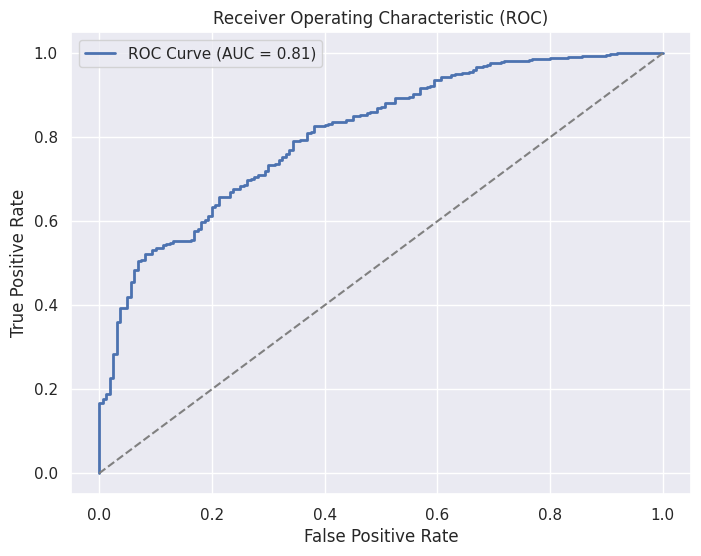

In [27]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.savefig("../images/roc_curve.png")
plt.show()